## Описание проекта

Вы аналитик компании «F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления.
Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.

### Описание данных

Есть файлы, в которых содержатся результаты запросов.

/datasets/query_1.csv — В нём содержится информация о:

model — модели самолета

flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года

/datasets/query_3.csv — В нём содержится информация о:

city — городах

average_flights — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года

Для этих двух наборов данных нужно:

импортировать файлы;

изучить данные в них;

проверить типы данных на корректность;

выбрать топ-10 городов по количеству рейсов;

построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;

сделать выводы по каждому из графиков, пояснить результат.

## Оглавление

### [Открытие файлов с данными и изучение общей информации](#step1)

   #### [Чтение файла и просмотр общей информации о датасете](#step1.1)
    
### [Анализ данных](#step2)
   
   #### [Выбрать топ-10 городов по количеству рейсов](#step2.1)
   
   #### [Построить график - модели самолетов и количество рейсов](#step2.2)
   
   #### [Построить график - города и количество рейсов](#step2.3)
 
   #### [Построить график - топ-10 городов и количество рейсов](#step2.4)

## 1. Открытие файлов с данными и изучение общей информации<a id="step1"></a> 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")

### 1.1 Чтение файлов и просмотр общей информации о датасете<a id="step1.1"></a> 

In [2]:
model = pd.read_csv('/datasets/query_1.csv', sep=',')
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [3]:
model.head(8)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
city = pd.read_csv('/datasets/query_3.csv', sep=',')
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [5]:
city.head(15)

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
5,Барнаул,2.612903
6,Белгород,6.000000
7,Белоярский,2.000000
8,Благовещенск,1.000000
9,Братск,1.000000


Полученные данные в порядке, типы данных корректны, пропущенных значений нет. Можно приступать к анализу.

## 2. Анализ данных<a id="step2"></a> 

### 2.1 Выбрать топ-10 городов по количеству рейсов<a id="step2.1"></a> 

In [6]:
city_top = city.sort_values(by = 'average_flights', ascending = False)[:10]
city_top.columns = ['город','среднее количество рейсов в день в августе 2018']
city_top

,город,среднее количество рейсов в день в августе 2018
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


### 2.2 Построить график - модели самолетов и количество рейсов<a id="step2.2"></a> 

In [7]:
model = model.sort_values(by = 'flights_amount', ascending = False)
model.columns = ['модель самолета','количество рейсов']
model

,модель самолета,количество рейсов
6,Cessna 208 Caravan,4557
5,Bombardier CRJ-200,4446
7,Sukhoi SuperJet-100,4185
1,Airbus A321-200,960
2,Boeing 737-300,630
0,Airbus A319-100,607
3,Boeing 767-300,600
4,Boeing 777-300,300


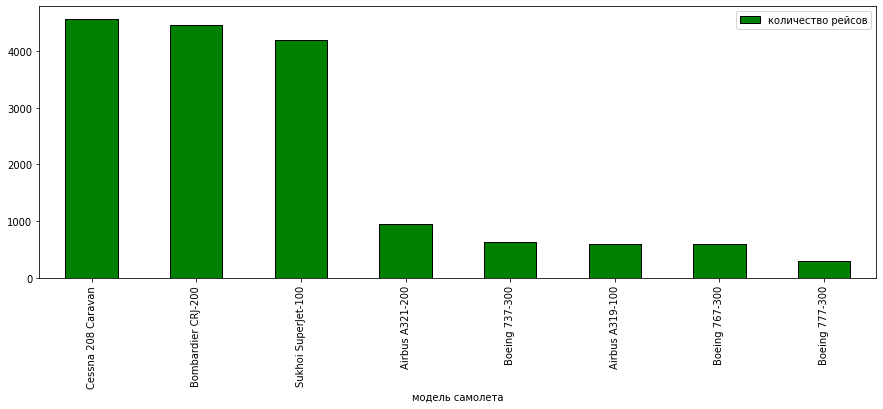

In [8]:
model.plot(x='модель самолета', y='количество рейсов', kind='bar', figsize=(15,5), color='green', ec='black')

#### Вывод

Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100 - лидеры по количеству рейсов. Cessna 208 Caravan - маленький самолет на 9-11 пассажиров оказался самым популярным, длина его полетов до 1800 км. Bombardier CRJ-200 - 50-ти местное, не отстающее по популярности в частоте использования воздушное судно. И замыкающий тройку лидеров Sukhoi SuperJet-100 - предназначен для перевозки от 87 до 108 пассажиров на дальность 3050 или 4600 км. На последнем месте Boeing 777-300 - самый крупный пассажирский самолет в мире (около 550 мест). Хочется отметить, что количество совершенных рейсов имеет обратную зависимость от вместимости самолета.

### 2.3 Построить график - города и количество рейсов<a id="step2.3"></a> 

In [9]:
city = city.sort_values(by = 'average_flights', ascending = False)
city.columns = ['город','среднее количество рейсов в день в августе 2018']

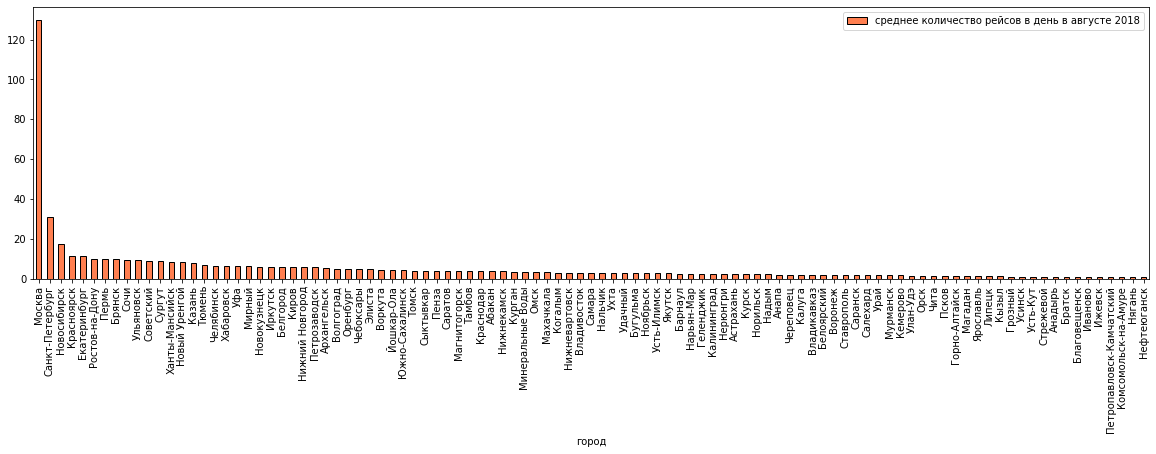

In [12]:
city.plot(x='город', y='среднее количество рейсов в день в августе 2018', kind='bar', figsize=(20,5), color='coral', ec='black')

### 2.4 Построить график - топ-10 городов и количество рейсов<a id="step2.4"></a> 

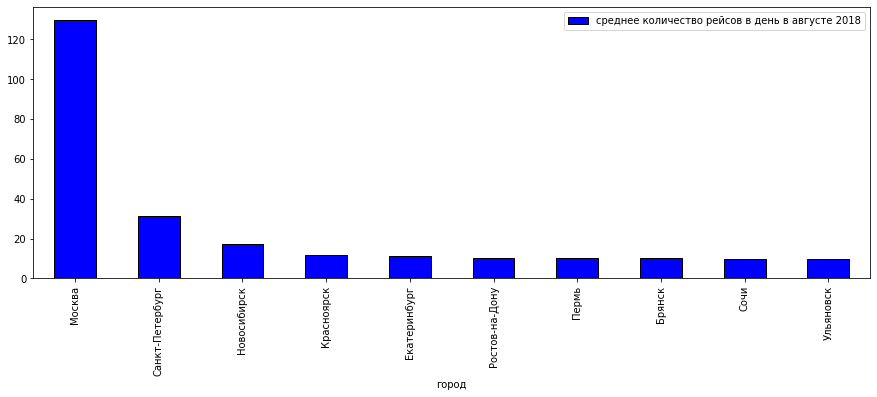

In [13]:
city_top.plot(x='город', y='среднее количество рейсов в день в августе 2018', kind='bar', figsize=(15,5), color='blue', ec='black')

#### Вывод

Самое большое кол-во прибывающих рейсов в Москве. Это не удивительно и ожидаемо, так как Москва- транспортный центр России. На втором месте с большим отрывом Санкт-Петербург, на третьем - Новосибирск. Остальные города (центр Урала, Сибири и южной части России) на одном уровне по количеству прибывающих рейсов в день.